# Describing Distributions

In [49]:
# Import useful libraries
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

# Set some nice plot defaults
plt.rcParams['figure.figsize'] = (10, 8)#(16, 10)   # Bigger
sns.set_style("darkgrid")


# Scipy Library

Last week we rolled our own distributions as a learning exercise.  IRL we'll using libraries that are correct and fast, in Python: Scipy, which has these baked in.

Go see: https://docs.scipy.org/doc/scipy/reference/stats.html

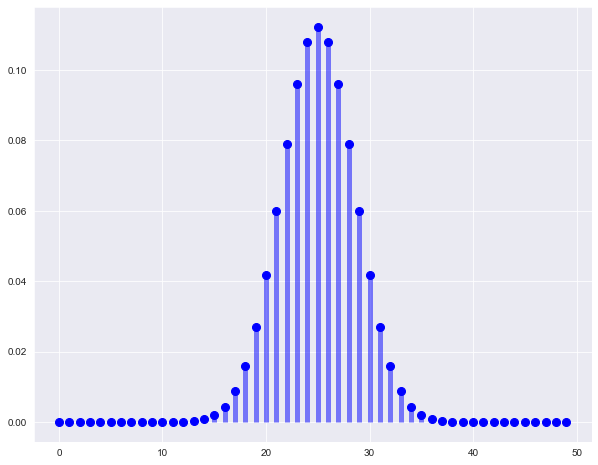

In [51]:
# Lets do a binomial
fig, ax = plt.subplots(1, 1)

n, p = 50, 0.5   # Set the parameters of the distribution

x = np.arange(0, n) 
y = binom.pmf(x, n, p)
plt.plot(x, y, 'bo', ms=8)   # Plot circles
ax.vlines(x, 0, y, colors='b', lw=5, alpha=0.5) # Plot lines

## Centrality - Expectation

Expectation (Average, or mean) reduces all the information contained in a distribution to a single number reperesenting its 'center'.  By one definition of center (there are few others such as mode and median).

Alegbraically we have:
\begin{align*}
\mathbb{E}(X) =& \sum_x x*p(x)\\
=& \mu
\end{align*}

Where we often use $\mu$ as shorthand symbol for mean.

In [43]:
# So we can do this directly from the SciPy objects
def expected_value(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

n, p = 50, 0.5   # Set the parameters of the distribution
x = np.arange(0, n) 
y = binom.pmf(x, n, p)

expected_value(x, y)

24.999999999999947

In [23]:
# But this is unnecessary as Scipy provides a better method
mean = binom.stats(n, p, moments='m')
mean

# Why is this better ?
# When doesn't it appy ?

array(25.)

$\mathbb{E}$ is what we call a linear operator.  That is 
$$
\mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y)
$$
$$
\mathbb{E}(aX + bY) = a\mathbb{E}(X) + b\mathbb{E}(Y)
$$

### Why mean is not enough

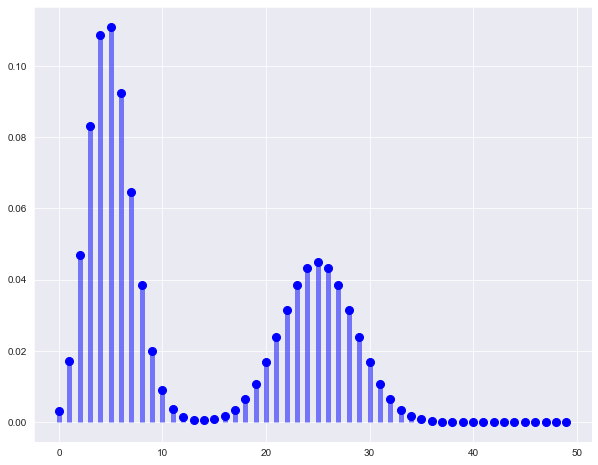

In [57]:
# Lets see this in code
fig, ax = plt.subplots(1, 1)

# Get the params of two RVs
n, p1, p2 = 50, 0.1, 0.5   # Set the parameters of the distribution
mix = 0.6

x = np.arange(0, n)          
m = mix*binom.pmf(x, n, p1) + (1-mix)*binom.pmf(x, n, p2)  # Add em
plt.plot(x, m, 'bo', ms=8, label='binom pmf')   # Plot circles
ax.vlines(x, 0, m, colors='b', lw=5, alpha=0.5) # Plot lines

In [58]:
# So the mean of this guy is
binom.stats(n, p1, moments='m')
mix*binom.stats(n, p1, moments='m') + (1-mix)*binom.stats(n, p2, moments='m')

# ROH ROH

13.0

## Spread - Variance

The next moment, is variance, or a the measure of dispersion of the distribution, aka how wide it is.

On way to think of it the Expecation of the distance from the mean
\begin{align*}
\textrm{Var}(X) =& \mathbb{E}((X - \mu)^2)\\
=& \sum_X p(x)\cdot(x - \mu)^2\\
=& \sigma^2\\
\end{align*}

The further moments of a distribution are Skew (how asymmetrical it is ) and kurtoses (how thick its tails are).  We'll explore them more when we get to continuous RVs...

... coming up next.